# Hydroponics Farm Sensor Data

The objective is to determine what LDR values should be, given all the other conditions. Using pandas, create a RandomForest model of the data using some of the rows of the data. Validate the data using a subset of your data. Evaluate your Mean Average Error (MAE). Predict what LDR should be expected given X values of \[temp1=40, temp2=20, heater is off, humidity1=60, humidity2=90, and pump =on].

# Importing the necessary libraries

In [137]:
import pandas as pd
import seaborn as sns

# Loading the data

In [138]:
df = pd.read_csv("https://raw.githubusercontent.com/Lormenyo/iot-projects/master/Final_Project_Designing_IoT_system/part_c/subscriber.csv")

In [139]:
df.head()

,DataID,DeviceName,DeviceType,CurrentReading,DateRead
0,1,humidity2,Humidity Sensor,78,2020-12-04 15:28:50
1,2,heater,Heater Actuator,0,2020-12-04 15:28:50
2,3,temp2,Temperature Sensor,28,2020-12-04 15:28:50
3,4,ldr,Light Intensity Sensor,283,2020-12-04 15:28:50
4,5,pump,Pump Actuator,1,2020-12-04 15:28:50


In [140]:
df['DateRead']= pd.to_datetime(df['DateRead']) 

# Exploring the Data

In [141]:
df.describe()

,DataID,CurrentReading
count,12564.000000,12564.000000
mean,6282.500000,71.822190
std,3627.058726,152.596608
min,1.000000,0.000000
25%,3141.750000,24.000000
50%,6282.500000,34.000000
75%,9423.250000,55.000000
max,12564.000000,999.000000


# Data Visualizations

In [142]:
new_df = df.copy()

new_df.drop("DataID", inplace=True, axis=1)
new_df.set_index("DateRead", inplace=True)

mean_new_df = new_df.groupby([new_df.index.hour, new_df.index.minute, new_df["DeviceName"]]).mean()
mean_new_df.rename_axis(index=['hours', 'minutes', 'DeviceName'], inplace=True)
mean_new_df.head()

CurrentReading
hours minutes DeviceName                
15    28      heater            0.500000
              humidity1        28.333333
              humidity2        58.333333
              ldr             477.000000
              pump              0.500000

In [143]:
mean_new_df.reset_index(inplace=True)
mean_new_df.head()

,hours,minutes,DeviceName,CurrentReading
0,15,28,heater,0.500000
1,15,28,humidity1,28.333333
2,15,28,humidity2,58.333333
3,15,28,ldr,477.000000
4,15,28,pump,0.500000


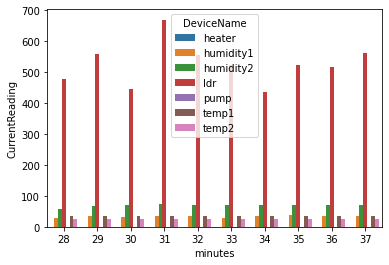

In [144]:
sns.barplot(x="minutes", hue="DeviceName", y="CurrentReading", data=mean_new_df[:70])

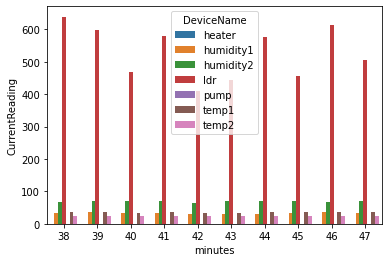

In [145]:
sns.barplot(x="minutes", hue="DeviceName", y="CurrentReading", data=mean_new_df[70:140])

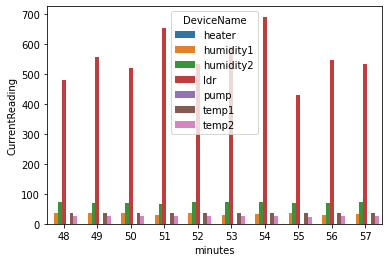

In [146]:
sns.barplot(x="minutes", hue="DeviceName", y="CurrentReading", data=mean_new_df[140:210])

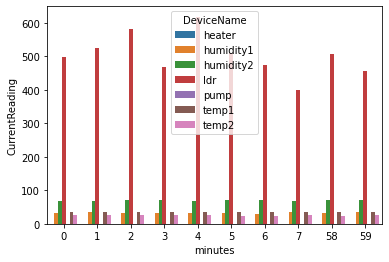

In [147]:
sns.barplot(x="minutes", hue="DeviceName", y="CurrentReading", data=mean_new_df[210:280])

### Temperature Trend

In [148]:
mean_temp1 = mean_new_df[mean_new_df["DeviceName"] == "temp1"]

In [149]:
mean_temp1.reset_index(inplace=True)

In [150]:
mean_temp1.head()

,index,hours,minutes,DeviceName,CurrentReading
0,5,15,28,temp1,34.444444
1,12,15,29,temp1,35.101695
2,19,15,30,temp1,34.551724
3,26,15,31,temp1,36.322034
4,33,15,32,temp1,35.423729


In [151]:
mean_temp2 = mean_new_df[mean_new_df["DeviceName"] == "temp2"]

In [152]:
mean_temp2.reset_index(inplace=True)

In [153]:
mean_temp2.head()

,index,hours,minutes,DeviceName,CurrentReading
0,6,15,28,temp2,24.800000
1,13,15,29,temp2,24.293103
2,20,15,30,temp2,25.067797
3,27,15,31,temp2,25.016949
4,34,15,32,temp2,24.465517


Text(0.5, 1.0, 'temp1 Average Temperature values per minute')

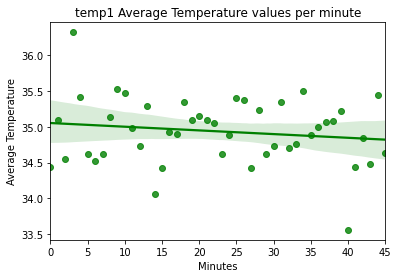

In [154]:
temp1_ax = sns.regplot(x=mean_temp1.index, y="CurrentReading", color="g", data=mean_temp1)
temp1_ax.set_xlabel("Minutes")
temp1_ax.set_ylabel("Average Temperature")
temp1_ax.set_title("temp1 Average Temperature values per minute")


The average temperature for temperature1 decreases slowly from about 35.1 to 34.9 during the 45 minute period. It seems to be fairly constant around 35.0.

Text(0.5, 1.0, 'temp2 Average Temperature values per minute')

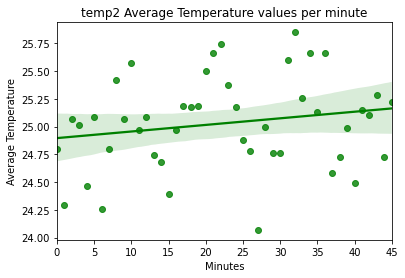

In [155]:
temp2_ax = sns.regplot(x=mean_temp2.index, y="CurrentReading", color="g", data=mean_temp2)
temp2_ax.set_xlabel("Minutes")
temp2_ax.set_ylabel("Average Temperature")
temp2_ax.set_title("temp2 Average Temperature values per minute")

The average temperature for temperature2 increases slowly from an average of about 24.85 to 25.10 during the 45 minute period.

### Humidity Trend

In [156]:
mean_humidity1 = mean_new_df[mean_new_df["DeviceName"] == "humidity1"]
mean_humidity2 = mean_new_df[mean_new_df["DeviceName"] == "humidity2"]

In [157]:
mean_humidity1.reset_index(inplace=True)
mean_humidity2.reset_index(inplace=True)

Text(0.5, 1.0, 'humidity1 Average Humidity values per minute')

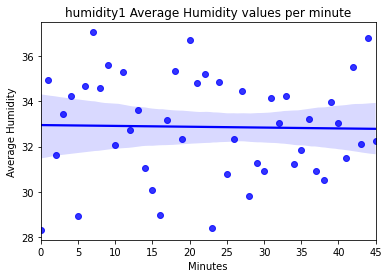

In [158]:
humidity1_ax = sns.regplot(x=mean_humidity1.index, y="CurrentReading", color="b", data=mean_humidity1)
humidity1_ax.set_xlabel("Minutes")
humidity1_ax.set_ylabel("Average Humidity")
humidity1_ax.set_title("humidity1 Average Humidity values per minute")

The average humidity for humidity1 is fairly constant around 33 during the 45 minute period.

Text(0.5, 1.0, 'humidity2 Average Humidity values per minute')

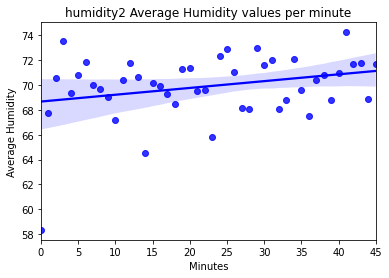

In [159]:
humidity2_ax = sns.regplot(x=mean_humidity2.index, y="CurrentReading", color="b", data=mean_humidity2)
humidity2_ax.set_xlabel("Minutes")
humidity2_ax.set_ylabel("Average Humidity")
humidity2_ax.set_title("humidity2 Average Humidity values per minute")

The average humidity for humidity2 increases slowly from an average of about 68.5 to 70 during the 45 minute period.

### Heater Trend

In [160]:
heater_actuator = df[df["DeviceType"] == "Heater Actuator"]

In [161]:
heater_actuator.drop("DataID", inplace=True, axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [162]:
heater_actuator.set_index("DateRead", inplace=True)
heater_actuator.head()

,DeviceName,DeviceType,CurrentReading
DateRead,,,
2020-12-04 15:28:50,heater,Heater Actuator,0
2020-12-04 15:28:55,heater,Heater Actuator,1
2020-12-04 15:29:00,heater,Heater Actuator,0
2020-12-04 15:29:05,heater,Heater Actuator,0
2020-12-04 15:29:10,heater,Heater Actuator,0


In [163]:
num_heater_on_times = heater_actuator.groupby([heater_actuator.index.hour, heater_actuator.index.minute]).mean()

In [164]:
num_heater_on_times.rename_axis(index=['hours', 'minutes'], inplace=True)
num_heater_on_times.reset_index(inplace=True)

Text(0.5, 1.0, 'Average Heater on times per minute')

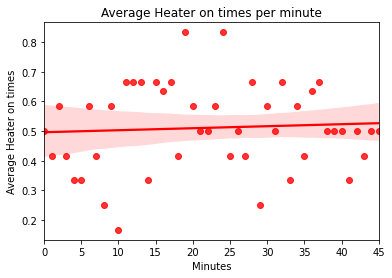

In [165]:
heater_ax = sns.regplot(x=num_heater_on_times.index, y="CurrentReading", color="r", data=num_heater_on_times)
heater_ax.set_xlabel("Minutes")
heater_ax.set_ylabel("Average Heater on times")
heater_ax.set_title("Average Heater on times per minute")

Considering the fact that the heater is a binary value, it makes sense that the heater is on 50% of the time during the 45 minute period.

### Pump Trend

Text(0.5, 1.0, 'Pump Average no of on times per minute')

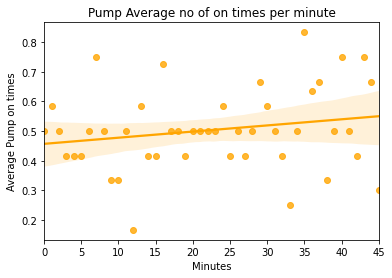

In [166]:
mean_pump = mean_new_df[mean_new_df["DeviceName"] == "pump"]

mean_pump.reset_index(inplace=True)

pump_ax = sns.regplot(x=mean_pump.index, y="CurrentReading", color="orange", data=mean_pump)
pump_ax.set_xlabel("Minutes")
pump_ax.set_ylabel("Average Pump on times")
pump_ax.set_title("Pump Average no of on times per minute")

# Data Preprocessing

In [167]:
# model_df.set_index("DateRead", inplace=True)
# trans_df = model_df.groupby([model_df.index.hour, model_df.index.minute, model_df.index.second, model_df["DeviceName"]])
trans_df = df.pivot_table('CurrentReading', ['DateRead', 'DeviceType'], 'DeviceName')


In [168]:
trans_df.head()

DeviceName                                  heater  humidity1  ...  temp1  temp2
DateRead            DeviceType                                 ...              
2020-12-04 15:28:50 Heater Actuator            0.0        NaN  ...    NaN    NaN
                    Humidity Sensor            NaN       44.0  ...    NaN    NaN
                    Light Intensity Sensor     NaN        NaN  ...    NaN    NaN
                    Pump Actuator              NaN        NaN  ...    NaN    NaN
                    Temperature Sensor         NaN        NaN  ...   32.0   28.0

[5 rows x 7 columns]

In [169]:
trans_df.reset_index( drop=False, inplace=True )

In [170]:
trans_df.shape

(7355, 9)

In [171]:
trans_df.head()

DeviceName,DateRead,DeviceType,heater,humidity1,humidity2,ldr,pump,temp1,temp2
0,2020-12-04 15:28:50,Heater Actuator,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-04 15:28:50,Humidity Sensor,NaN,44.0,78.0,NaN,NaN,NaN,NaN
2,2020-12-04 15:28:50,Light Intensity Sensor,NaN,NaN,NaN,283.0,NaN,NaN,NaN
3,2020-12-04 15:28:50,Pump Actuator,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,2020-12-04 15:28:50,Temperature Sensor,NaN,NaN,NaN,NaN,NaN,32.0,28.0


In [172]:
trans_df.fillna(method="ffill", inplace=True)
trans_df.fillna(method="bfill", inplace=True)

In [173]:
trans_df.head()

DeviceName,DateRead,DeviceType,heater,humidity1,humidity2,ldr,pump,temp1,temp2
0,2020-12-04 15:28:50,Heater Actuator,0.0,44.0,78.0,283.0,1.0,32.0,28.0
1,2020-12-04 15:28:50,Humidity Sensor,0.0,44.0,78.0,283.0,1.0,32.0,28.0
2,2020-12-04 15:28:50,Light Intensity Sensor,0.0,44.0,78.0,283.0,1.0,32.0,28.0
3,2020-12-04 15:28:50,Pump Actuator,0.0,44.0,78.0,283.0,1.0,32.0,28.0
4,2020-12-04 15:28:50,Temperature Sensor,0.0,44.0,78.0,283.0,1.0,32.0,28.0


In [174]:
trans_df.columns

Index(['DateRead', 'DeviceType', 'heater', 'humidity1', 'humidity2', 'ldr',
       'pump', 'temp1', 'temp2'],
      dtype='object', name='DeviceName')

# Splitting the data

In [175]:
X  = trans_df[['heater', 'humidity1', 'humidity2', 'pump', 'temp1', 'temp2']]
y = trans_df['ldr']

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [179]:
model = RandomForestRegressor(n_estimators=200,random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Evaluating the Model

In [180]:
from sklearn.metrics import mean_absolute_error

In [181]:
ldr_preds = model.predict(X_test)
print(f"Mean Absolute Error of Model Predictions: {mean_absolute_error(y_test, ldr_preds)}")

Mean Absolute Error of Model Predictions: 246.76729534118775


# Improving the model

In [182]:
from sklearn.model_selection import GridSearchCV,KFold
import numpy as np


In [183]:
# Create 10 folds
seed = 13
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

Defining our candidate hyperparameters

In [184]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

n_estimators = [500, 600, 700]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
hp_candidates = [{'n_estimators': n_estimators,
               'max_features': max_features},
              #  'max_depth': max_depth,
              #  'min_samples_split': min_samples_split,
              #  'min_samples_leaf': min_samples_leaf,
              #  'bootstrap': bootstrap}
              ]

In [185]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=13, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=200, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose

In [186]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.0951164268239466
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
{'max_features': 'auto', 'n_estimators': 600}


In [187]:
mean_abs_errors = []
for i in range(500, 2000, 50):
  model = RandomForestRegressor(n_estimators=i, random_state=0)
  model.fit(X_train, y_train)
  mae = mean_absolute_error(y_train, model.predict(X_train))
  mean_abs_errors.append(mae)

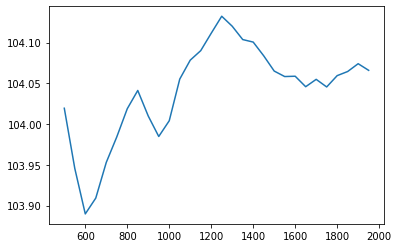

In [188]:
import matplotlib.pyplot as plt

plt.plot(list(range(500, 2000, 50)), mean_abs_errors)

The best model has n_estimators = 600

In [189]:
  model = RandomForestRegressor(n_estimators=600, random_state=0)
  model.fit(X_train, y_train)
  mae = mean_absolute_error(y_train, model.predict(X_train))
  print(f"Mean Absolute Error of Model Predictions(Training Data): {mae}")

Mean Absolute Error of Model Predictions(Training Data): 103.88984941071368


In [190]:
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  print(f"Mean Absolute Error of Model Predictions(Testing Data): {mae}")

Mean Absolute Error of Model Predictions(Testing Data): 247.00906174944475


In [191]:
predictions = pd.DataFrame(zip(y_test, y_pred), columns=["LDR Actual Value", "LDR Predicted Value"])
predictions

,LDR Actual Value,LDR Predicted Value
0,602.0,462.736556
1,239.0,344.180056
2,947.0,364.255139
3,384.0,348.439667
4,933.0,651.088194
...,...,...
2202,922.0,762.589824
2203,853.0,480.804583
2204,914.0,488.410222
2205,836.0,718.121389


# LDR value Prediction 

- temp1=40
- temp2=20
- heater is off
- humidity1=60
- humidity2=90
- pump =on

In [192]:
X_test.shape

(2207, 6)

In [193]:
X_test.columns

Index(['heater', 'humidity1', 'humidity2', 'pump', 'temp1', 'temp2'], dtype='object', name='DeviceName')

In [194]:

x_test = pd.DataFrame( [[0, 60, 90, 1, 40, 20]],columns=['heater', 'humidity1', 'humidity2', 'pump', 'temp1', 'temp2'])
x_test

,heater,humidity1,humidity2,pump,temp1,temp2
0,0,60,90,1,40,20


In [195]:
x_test["Predicted LDR value"] = model.predict(x_test)
x_test

,heater,humidity1,humidity2,pump,temp1,temp2,Predicted LDR value
0,0,60,90,1,40,20,544.557361


The predicted LDR value when the heater is off, pump is on, humidity1 is 60, humidity2 is 90, temp1 is 40 and temp2 is 20 is 544.551 [+/- 247]